# Read Data

In [153]:
import numpy as np
import pandas as pd

In [154]:
df = pd.read_csv('Data/Credit Card Customer Data.csv',sep=';',engine='python')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [155]:
df.shape

(660, 7)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


# Data Cleaning

In [157]:
df.duplicated().sum()

0

In [158]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [159]:
drops = ['Sl_No']

df.drop(columns=drops, inplace=True)

In [160]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


# EDA 

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16748\1786827030.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Credit_Cards'])


<Axes: xlabel='Total_Credit_Cards', ylabel='Density'>

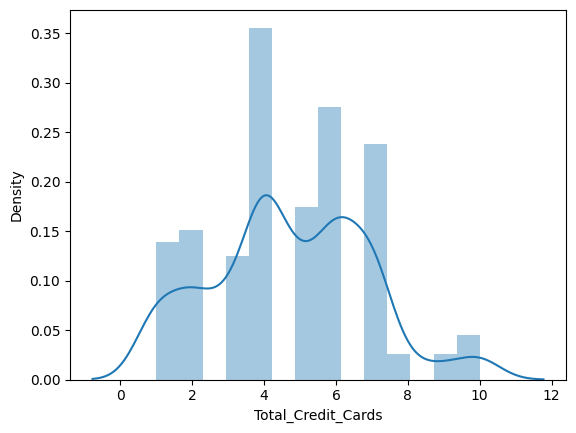

In [162]:
sns.distplot(df['Total_Credit_Cards'])

<Axes: xlabel='Total_Credit_Cards'>

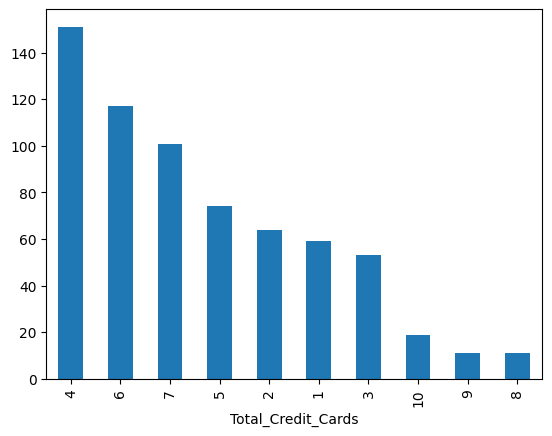

In [163]:
df['Total_Credit_Cards'].value_counts().plot(kind='bar')

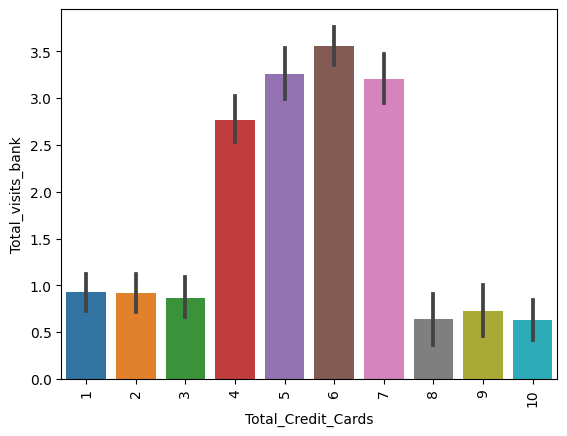

In [164]:
sns.barplot(x=df['Total_Credit_Cards'], y=df['Total_visits_bank'])
plt.xticks(rotation='vertical')
plt.show()

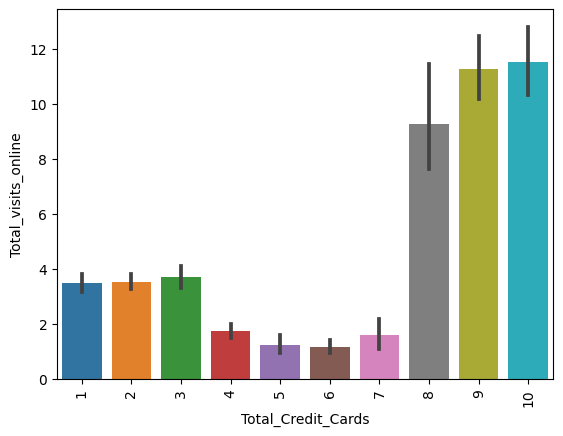

In [165]:
sns.barplot(x=df['Total_Credit_Cards'], y=df['Total_visits_online'])
plt.xticks(rotation='vertical')
plt.show()

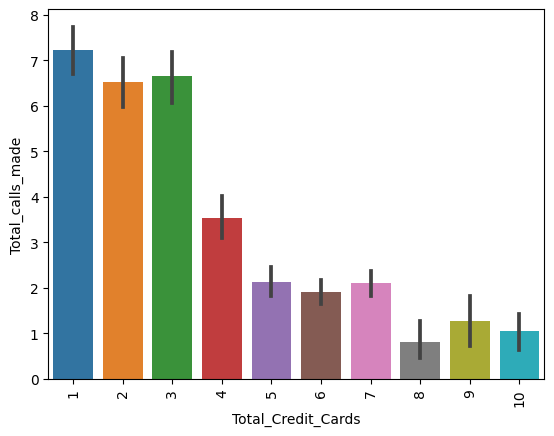

In [166]:
sns.barplot(x=df['Total_Credit_Cards'], y=df['Total_calls_made'])
plt.xticks(rotation='vertical')
plt.show()

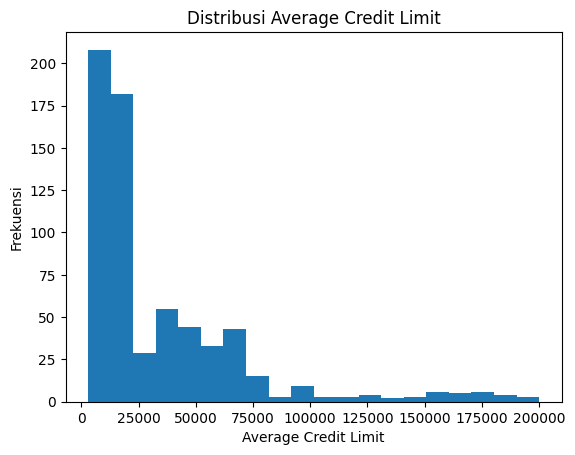

In [167]:
plt.hist(df['Avg_Credit_Limit'], bins=20)
plt.xlabel('Average Credit Limit')
plt.ylabel('Frekuensi')
plt.title('Distribusi Average Credit Limit')
plt.show()

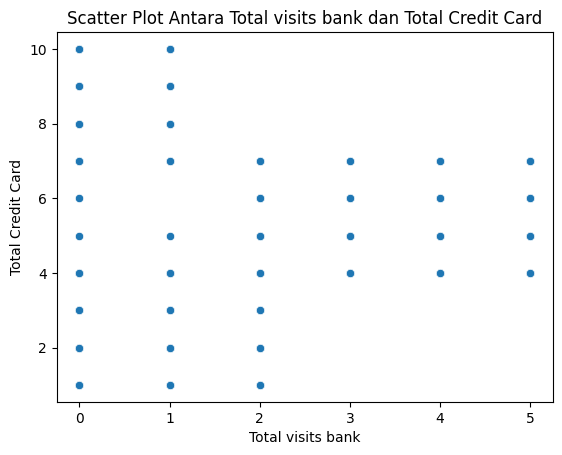

In [168]:
sns.scatterplot(x=df['Total_visits_bank'], y=df['Total_Credit_Cards'])
plt.xlabel('Total visits bank')
plt.ylabel('Total Credit Card')
plt.title('Scatter Plot Antara Total visits bank dan Total Credit Card')
plt.show()

Identifikasi Outlier

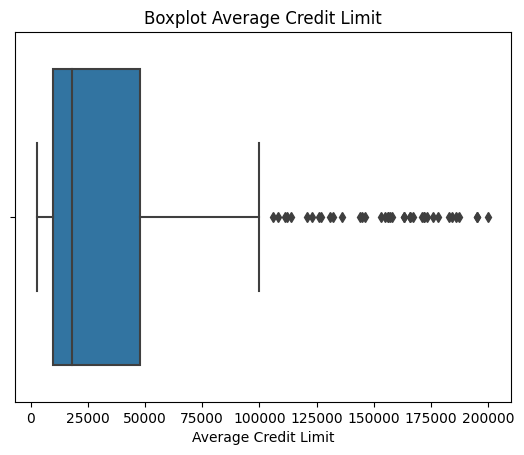

In [169]:
sns.boxplot(x=df['Avg_Credit_Limit'])
plt.xlabel('Average Credit Limit')
plt.title('Boxplot Average Credit Limit')
plt.show()

In [84]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


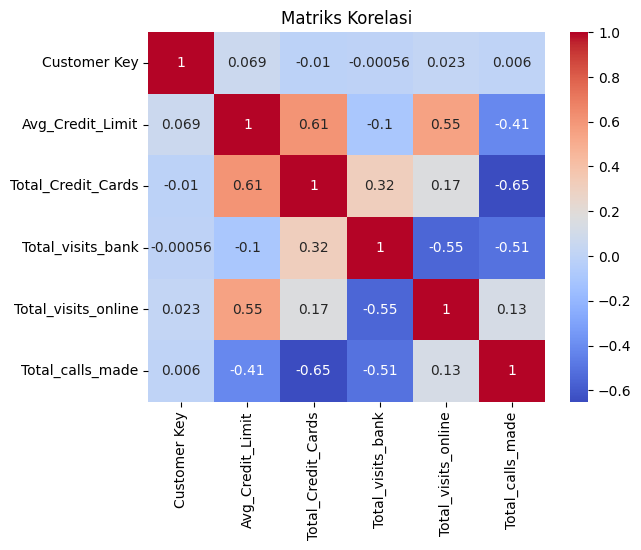

In [ ]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

# Preprocessing

In [85]:
X_scaled = df[['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].values

In [86]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)

In [88]:
label_encoder = LabelEncoder()
df['Total_Credit_Cards'] = label_encoder.fit_transform(df['Total_Credit_Cards'])

In [89]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

In [87]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

c:\Users\skaha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\skaha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\skaha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\skaha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

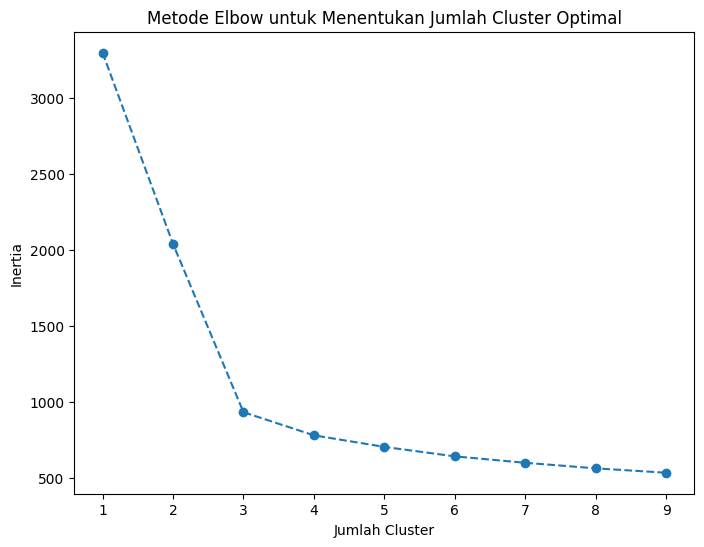

In [90]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [91]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

c:\Users\skaha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [92]:
df['Cluster'] = kmeans.labels_

In [94]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,100000,1,1,1,0,0
1,50000,2,0,10,9,1
2,50000,6,1,3,4,0
3,30000,4,1,1,4,0
4,100000,5,0,12,3,2
...,...,...,...,...,...,...
655,99000,9,1,10,0,2
656,84000,9,1,13,2,2
657,145000,7,1,9,1,2
658,172000,9,1,15,0,2


In [95]:
df.groupby('Cluster').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,
0,33782.383420,4.515544,3.489637,0.981865,2.000000
1,12174.107143,1.410714,0.933036,3.553571,6.870536
2,141040.000000,7.740000,0.600000,10.900000,1.080000


In [96]:
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
(f"Silhouette Score: {silhouette_avg}")

'Silhouette Score: 0.5157182558881063'

# Modelling

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [176]:
y_cluster = kmeans.fit_predict(X_scaled)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Melihat label cluster

In [177]:
y_cluster

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Menentukan centroid

In [182]:
 centroid = kmeans.cluster_centers_

In [183]:
centroid

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

Text(0, 0.5, 'Total_visits_bank')

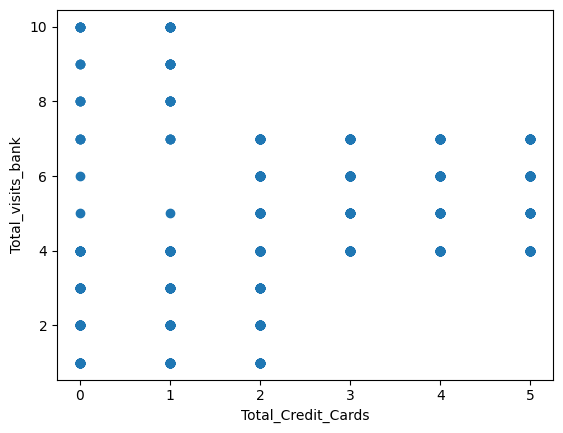

In [184]:
plt.scatter(df["Total_visits_bank"], df["Total_Credit_Cards"])
plt.xlabel("Total_Credit_Cards")
plt.ylabel("Total_visits_bank")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16748\1200312021.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroid[0,0],centroid[0,1],cmap='blue',marker='*',s=150, label='Centroid 0')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16748\1200312021.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroid[1,0],centroid[1,1],cmap='orange',marker='*',s=150, label='Centroid 1')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16748\1200312021.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroid[2,0],centroid[2,1],cmap='green',marker='*',s=150, label='Centroid 2')


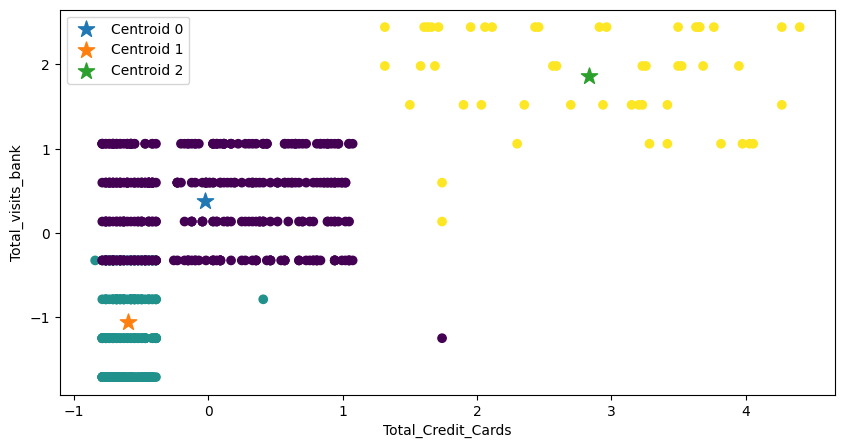

In [189]:
plt.figure(figsize = (10,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_)
plt.scatter(centroid[0,0],centroid[0,1],cmap='blue',marker='*',s=150, label='Centroid 0')
plt.scatter(centroid[1,0],centroid[1,1],cmap='orange',marker='*',s=150, label='Centroid 1')
plt.scatter(centroid[2,0],centroid[2,1],cmap='green',marker='*',s=150, label='Centroid 2')
plt.xlabel("Total_Credit_Cards")
plt.ylabel("Total_visits_bank")
plt.legend()
plt.show()